In [9]:
from array import array
import matplotlib.pyplot as plt

In [10]:
def fderiv(y,t,deriv):
    deriv[0] = 2.0*t*y[0]*y[0]
    #deriv[0] = a*math.pow(math.sin(t),2)*y[0]

In [11]:
def yexact(t):
    return 1.0/(1.0-t*t)
    #return 2*param[0]*math.exp(0.5*(t - math.sin(t)*math.cos(t)))

In [12]:
def euler(y,nY,t,tau,deriv):
    F1 = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
    
    fderiv(y,t,F1)
    
    for i in range(0,nY):
        y[i] = y[i] + tau*F1[i]

In [13]:
def rk2(y,nY,t,tau,deriv):
    F1 = array('d')
    F2 = array('d')
    ytemp = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
        F2.append(0.0)
        ytemp.append(0.0)
    
    fderiv(y,t,F1)
    
    half_tau = 0.5*tau
    t_half = t + half_tau
    
    for i in range(0,nY):
        ytemp[i]=y[i]+half_tau*F1[i]
        
    fderiv(ytemp,t_half,F2)
        
    for i in range(0,nY):
        y[i] = y[i] + tau*F2[i]

In [14]:
# Wikipedia page y' = (sin(t))^2*y

nStep = 100000
a = 0.9999
tau = a/nStep

# Everything below this point is calculated.
y0 = 1.0
yp0 = 0.0

tlow = 0
thigh = tlow + (nStep-1)*tau

yy = array('d')
tt = array('d')
nexact = 10000
dt = (thigh-tlow)/nexact
for i in range(0,nexact+1):
    texact = tlow + i*dt
    yy.append(yexact(texact))
    tt.append(texact)
    
#print(yy,tt)

In [15]:
y1 = array('d')
y2 = array('d')
y3 = array('d')

state1 = array('d')
state2 = array('d')
state3 = array('d')

deriv1 = array('d')
deriv2 = array('d')
deriv3 = array('d')

nState = 1

y1.append(y0)
y2.append(y0)
y3.append(y0)

state1.append(y1[0])
state2.append(y2[0])
state3.append(y3[0])

for i in range(0,nState):
    deriv1.append(yp0)
    deriv2.append(yp0)
    deriv3.append(yp0)
    
yplot1 = array('d')
yplot2 = array('d')
yplot3 = array('d')

tplot1 = array('d')
tplot2 = array('d')
tplot3 = array('d')

for method in range(1,4):
    time = 0.0
    for iStep in range(0,nStep+1):
        
        if (method == 1):
            yplot1.append(y1[0])
            tplot1.append(time)
            euler(state1,nState,time,tau,deriv1)
            y1[0] = state1[0]
            time = time + tau
        else:
            if (method == 2):
                yplot2.append(y2[0])
                tplot2.append(time)
                euler(state2,nState,time,tau/2.0,deriv2)
                y2[0] = state2[0]
                time = time + tau/2.0
                yplot2.append(y2[0])
                tplot2.append(time)
                euler(state2,nState,time,tau/2.0,deriv2)
                y2[0] = state2[0]
                time = time + tau/2.0
            else:
                rk2(state3,nState,time,tau,deriv3)
                y3[0]=state3[0]
                time = time + tau
                yplot3.append(y3[0])
                tplot3.append(time)
                

print (tplot1[nStep],tplot2[2*nStep],tplot3[nStep])    

0.9998999999988085 0.9998999999985428 0.9999099989988085


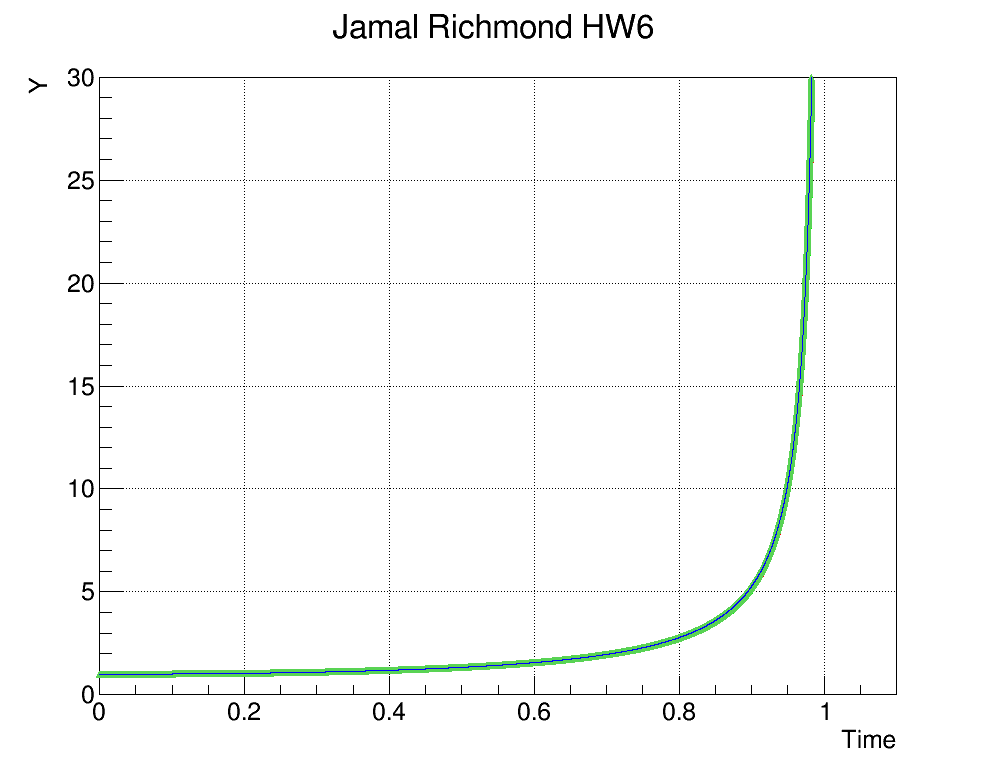

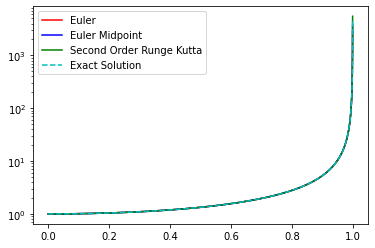

In [20]:
plt.plot(tplot1,yplot1,'r-',label='Euler')
plt.plot(tplot2,yplot2,'b-',label='Euler Midpoint')
plt.plot(tplot3,yplot3,'g-',label='Second Order Runge Kutta')
plt.plot(tt,yy,'c--',label='Exact Solution')
plt.yscale('log')
plt.legend()